In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as dates

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

<IPython.core.display.Javascript object>


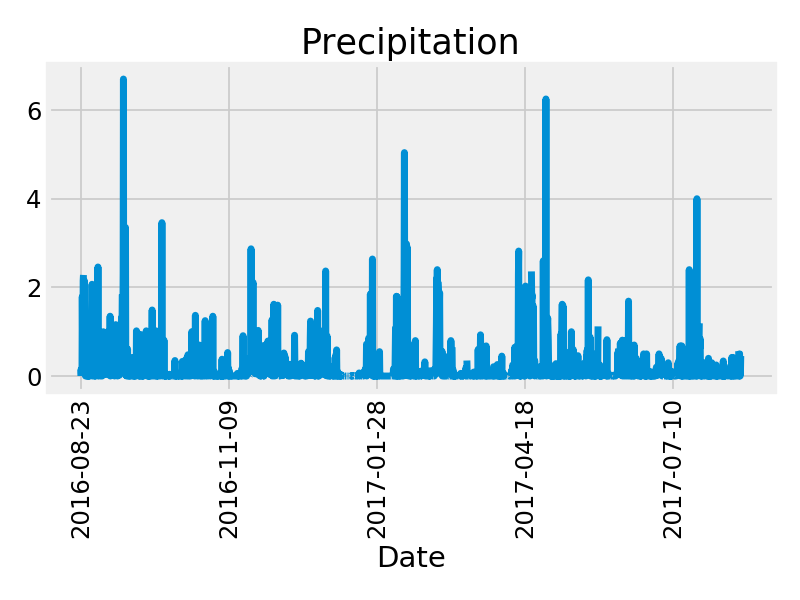

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
precipitation = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date.between('2016-08-23','2017-08-23')).\
    order_by(Measurement.date).all()


# Calculate the date 1 year ago from today

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precipitation[:],columns=['Date','Precipitation'])
# Sort the dataframe by date
df.set_index('Date',inplace=False)
df.head()
# Use Pandas Plotting with Matplotlib to plot the data
dates=df["Date"]
dates.tolist()
plt.plot(df["Precipitation"])

# Rotate the xticks for the dates
plt.title('Precipitation')
plt.xlabel('Date')

labels=[dates[0],dates[500],dates[1000],dates[1500],dates[2000]]
loc=[0,500,1000,1500,2000]

plt.xticks(loc,labels,rotation="vertical")

plt.tight_layout()
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data


,precipitation
count,412.000000
mean,0.117549
std,0.294210
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.000000


In [14]:
# How many stations are available in this dataset?
numofstations=session.query(Station.station).count()
numofstations

9

In [15]:
# What are the most active stations?
# List the stations and the counts in descending order.
active = session.query(Measurement.station,Measurement.tobs)
df2=pd.DataFrame(active[:],columns=["Stations","TOBS"])
activestations=df2.groupby("Stations").count().sort_values('TOBS',ascending=False)
activestations

,TOBS
Stations,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
mostactivestation=df2.loc[df2['Stations']==activestations.index[0]]
mostactivestation
results1=[mostactivestation["TOBS"].min(),mostactivestation["TOBS"].max(),mostactivestation["TOBS"].mean()]
results1

[54.0, 85.0, 71.66378066378067]

<IPython.core.display.Javascript object>


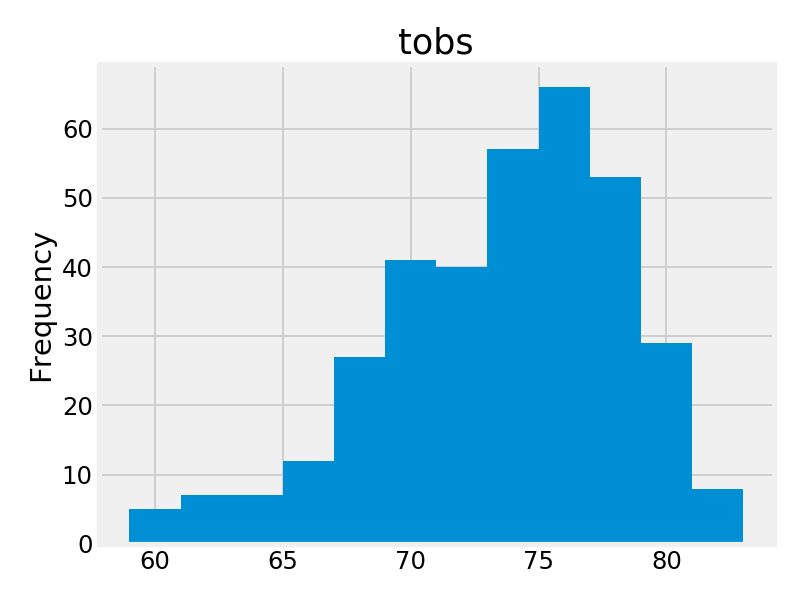

In [17]:
# Choose the station with the highest number of temperature observations.
mastemp=activestations.index[0]
mastemp
mas = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.date.between('2016-08-23','2017-08-23')).\
    filter(Measurement.station==mastemp).\
    order_by(Measurement.date).all()

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df3 = pd.DataFrame(mas)

df3.hist(bins=12)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [22]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2015-12-01', '2015-12-09'))

[(65.0, 73.25454545454545, 81.0)]


In [20]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
tat=calc_temps('2016-04-24','2017-04-24')
tat

[(59.0, 74.36631944444444, 84.0)]

<IPython.core.display.Javascript object>


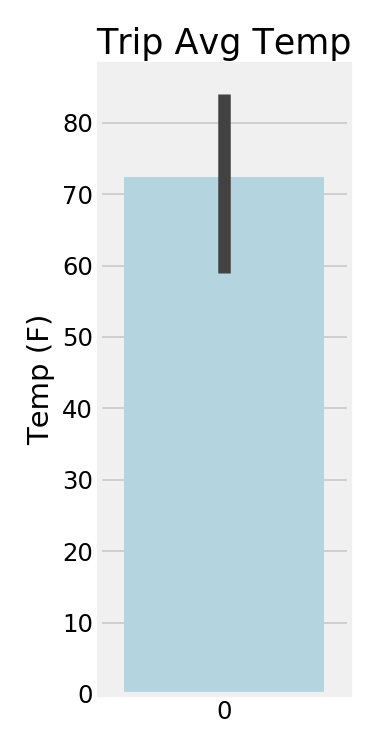

In [23]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.figure(figsize=(3,6))
sns.barplot(data=tat,color="lightblue")
plt.ylabel('Temp (F)')
plt.title('Trip Avg Temp')


# .plot()
plt.tight_layout()
plt.show()

In [24]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
session.query(Measurement.station, Station.name, Station.latitude, Station.longitude, Measurement.prcp).\
    filter(Measurement.date.between('2016-04-24','2017-04-24')).\
    group_by(Measurement.station).\
    join(Station, Measurement.station==Station.station).\
    order_by(Measurement.prcp.desc()).all()


[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 0.05),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 0.01),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 0.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 0.0),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  None),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, None),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  None)]

## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


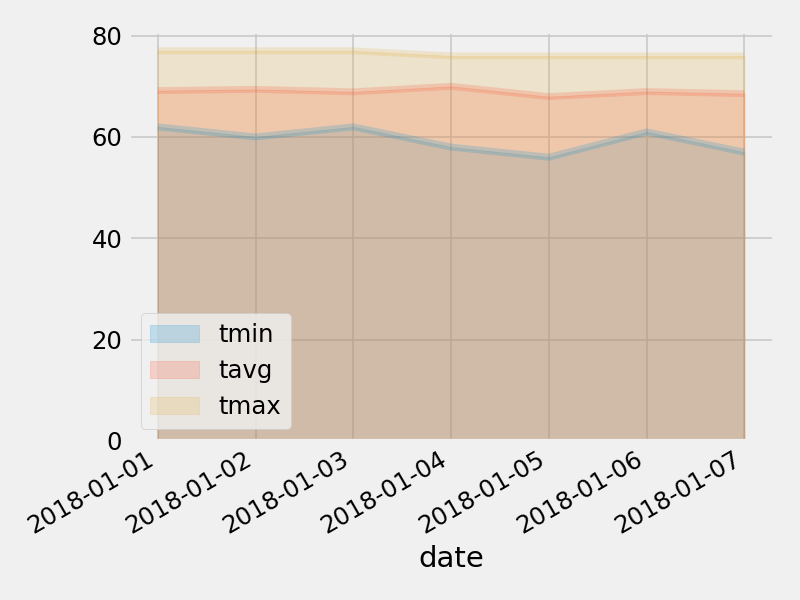

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
